# tuto Cnn
site : [learopencv](https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/)

In [9]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def plothistory(history):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
     
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(history.history['acc'],'r',linewidth=3.0)
    plt.plot(history.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

modèle CIFAR10 appliqué aux données du MNIST

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

fit CIFAR10

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 127s 2ms/step - loss: 0.5529 - acc: 0.8177 - val_loss: 0.0959 - val_acc: 0.9692
Epoch 2/100
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1158 - acc: 0.9668 - val_loss: 0.0512 - val_acc: 0.9833
Epoch 3/100
60000/60000 [==============================] - 157s 3ms/step - loss: 0.0721 - acc: 0.9792 - val_loss: 0.0328 - val_acc: 0.9905
Epoch 4/100
60000/60000 [==============================] - 195s 3ms/step - loss: 0.0554 - acc: 0.9842 - val_loss: 0.0272 - val_acc: 0.9923
Epoch 5/100
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0454 - acc: 0.9872 - val_loss: 0.0487 - val_acc: 0.9852
Epoch 6/100
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0388 - acc: 0.9888 - val_loss: 0.0233 - val_acc: 0.9931
Epoch 7/100
60000/60000 [==============================] - 184s 3ms/step - loss: 0.0342 - acc: 0.9904 - val_loss: 0.

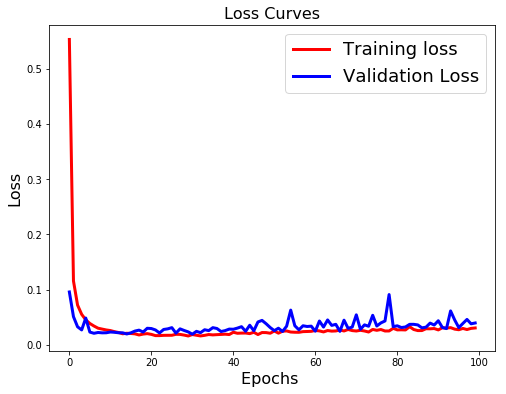

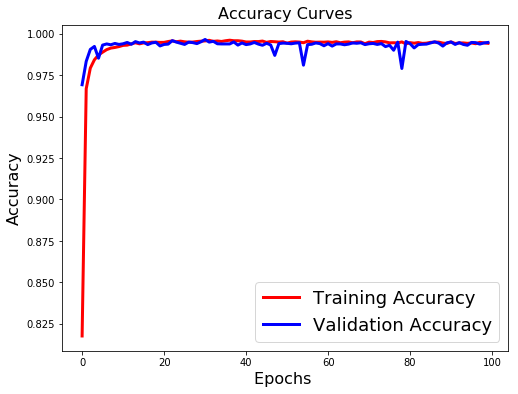

In [4]:
batch_size = 256
epochs = 100

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))
 
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plothistory(history)

sauvegarde du modèle longement calculé.

vu dans [machinelearningmastery](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

In [5]:
nom = "model_mnist_6cnn_100epoch"
# serialize model to JSON
model_json = model.to_json()
with open(nom+'.json', 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(nom + '.h5')
print(nom+' saved to disk')

model_mnist_6cnn_100epoch saved to disk


restauration

In [6]:
nom = "model_mnist_6cnn_100epoch"
from keras.models import model_from_json
json_file = open(nom+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(nom + '.h5')
print('Loaded model from disk')
model = loaded_model
# compilation necessaire, les poids ne sont pas suffisants
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Loaded model from disk


création d'un flux d'images déformée.

In [20]:
from keras.preprocessing.image import ImageDataGenerator

data_gen_args = dict(
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.,
    zoom_range=.1,
    horizontal_flip=False,
    vertical_flip=False)
traingen = ImageDataGenerator(**data_gen_args)
testgen = ImageDataGenerator(**data_gen_args)

traingen.fit(x_train)
testgen.fit(x_test)

évaluation sur les données de test
```
Test loss: 0.22434870748278227
Test accuracy: 0.9576
```
pas génial le modèle ne semble pas capable de bien s'adapter au décentrage ou autres variation de l'image. il faudrait lancer l'apprentissage avec les images déformées.


In [26]:
score = model.evaluate_generator(testgen.flow(x_test, y_test, batch_size = 32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22434870748278227
Test accuracy: 0.9576


In [27]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 5s 509us/step
Test loss: 0.039738636150588806
Test accuracy: 0.9947


évaluation sur les données d'entrainement 

In [28]:
score = model.evaluate_generator(traingen.flow(x_train, y_train, batch_size = 32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2483869179025734
Test accuracy: 0.9545666666666667


fit MNIST

In [6]:
batch_size = 128
epochs = 12

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plothistory(history)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 141s 2ms/step - loss: 0.4760 - acc: 0.8443 - val_loss: 0.0689 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0954 - acc: 0.9731 - val_loss: 0.0345 - val_acc: 0.9897
Epoch 3/12
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0665 - acc: 0.9816 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 197s 3ms/step - loss: 0.0526 - acc: 0.9846 - val_loss: 0.0297 - val_acc: 0.9903
Epoch 5/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0453 - acc: 0.9870 - val_loss: 0.0237 - val_acc: 0.9929
Epoch 6/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0391 - acc: 0.9888 - val_loss: 0.0213 - val_acc: 0.9937
Epoch 7/12
60000/60000 [==============================] - 200s 3ms/step - loss: 0.0343 - acc: 0.9905 - val_loss: 0.0206 - 

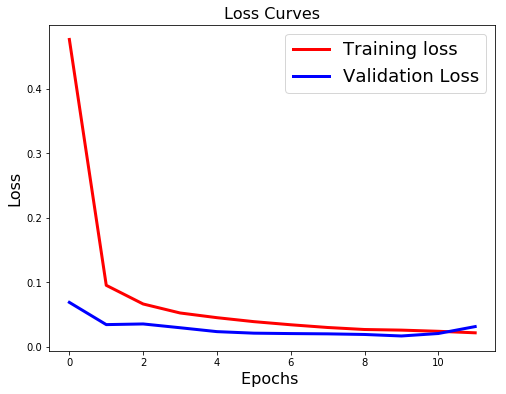

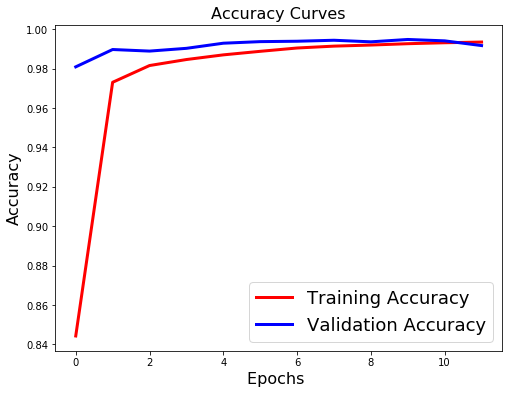

In [9]:
plothistory(model.model.history)

In [10]:
nom = "model_mnist_6cnn_12epoch"
# serialize model to JSON
model_json = model.to_json()
with open(nom+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(nom + ".h5")
print(nom+" saved to disk")

model_mnist_6cnn_12epoch saved to disk
